# **IMPORT MODULE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import random
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **IMPORT DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasepeda.xlsx to datasepeda.xlsx


In [ ]:
df = pd.read_excel("datasepeda.xlsx", header=0)
df.head()

,bike_name,description
0,S-Works Shiv Disc,We've never been ones for dogmatic rules. And ...
1,S-Works Aethos - Dura Ace Di2,"For once, we're not in it to win. With Aethos,..."
2,S-Works Stumpjumper,"When we say ""The Ultimate Trail Bike,"" we mean..."
3,Shiv Expert Disc,We've never been ones for dogmatic rules. And ...
4,Aethos Pro - Ultegra Di2,The Aethos line promises three things: unprece...


In [ ]:
df.describe()

,bike_name,description
count,164,164
unique,153,156
top,S-Works Enduro,"All barn-burner and no benchwarmer, the Rockho..."
freq,2,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bike_name    164 non-null    object
 1   description  164 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [ ]:
def print_description(index):
    example = df[df.index == index][['description','bike_name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Bike Name:', example[1])

In [ ]:
print_description(108)

They say that every journey begins with a single step, but when that journey is related to exercise, that first step can sure be a doozy. It can be life-changing, however, and there's no better machine to take the plunge with than with the Roll. With its lightweight alloy frame and fork, nine speeds of "go fast" gearing, stable and wide 650b tires, and powerful hydraulic disc brakes, the Roll does everything in its power to encourage and motivate you to keep fit and get around in comfortable, efficient style. The Roll is made of our A1 Premium Aluminum, and it features our Ground Control Positioning that makes it easy to put a foot down when stopped. This Roll also comes ready with rack/fender mounts. Wide diameter, 650b x 2.3" Nimbus II Sport Reflect tires provide excellent traction, stability, and cushioning, which creates a safer, more reliable, and more comfortable ride on either paved or dirt roads. Plus, the reflective accents of the tire increase your visibility to motorists in 

#**TEXT PRE-PROCESSING**
- Case Folding
- Stopword Removal
- Remove Punctuation
- Lemmatization
- Tokenizing




###**Case Folding**

In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding  
df['lwr'] = df['description'].apply(clean_lower)

In [ ]:
df['lwr']

0      we've never been ones for dogmatic rules. and ...
1      for once, we're not in it to win. with aethos,...
2      when we say "the ultimate trail bike," we mean...
3      we've never been ones for dogmatic rules. and ...
4      the aethos line promises three things: unprece...
                             ...                        
159    you have places to go, people to see, and fitn...
160    sirrus x is your ticket to riding more, and to...
161    the rugged pitch comp 1x is built to get you w...
162    that spot where the bike path turns from concr...
163    a mountain bike is freedom: the ability to pic...
Name: lwr, Length: 164, dtype: object

In [ ]:
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,we've never been ones for dogmatic rules. and ...
1,"for once, we're not in it to win. with aethos,..."
2,"when we say ""the ultimate trail bike,"" we mean..."
3,we've never been ones for dogmatic rules. and ...
4,the aethos line promises three things: unprece...
...,...
159,"you have places to go, people to see, and fitn..."
160,"sirrus x is your ticket to riding more, and to..."
161,the rugged pitch comp 1x is built to get you w...
162,that spot where the bike path turns from concr...


In [ ]:
file_name = 'casefolding.xlsx'
  
# saving the excel 
casefolding.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### **Remove Puctuation**

In [ ]:
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')


def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
df['clean_punct'] = df['lwr'].apply(clean_punct)

In [ ]:
df['clean_punct']

0      we ve never been ones for dogmatic rules  and ...
1      for once we re not in it to win  with aethos w...
2      when we say  the ultimate trail bike  we mean ...
3      we ve never been ones for dogmatic rules  and ...
4      the aethos line promises three things  unprece...
                             ...                        
159    you have places to go people to see and fitnes...
160    sirrus x is your ticket to riding more and to ...
161    the rugged pitch comp 1x is built to get you w...
162    that spot where the bike path turns from concr...
163    a mountain bike is freedom  the ability to pic...
Name: clean_punct, Length: 164, dtype: object

#### **Remove Double Whitespace**

In [ ]:
def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_ws'] = df['clean_punct'].apply(_normalize_whitespace)

In [ ]:
df['clean_double_ws']

0      we ve never been ones for dogmatic rules and w...
1      for once we re not in it to win with aethos we...
2      when we say the ultimate trail bike we mean it...
3      we ve never been ones for dogmatic rules and w...
4      the aethos line promises three things unpreced...
                             ...                        
159    you have places to go people to see and fitnes...
160    sirrus x is your ticket to riding more and to ...
161    the rugged pitch comp 1x is built to get you w...
162    that spot where the bike path turns from concr...
163    a mountain bike is freedom the ability to pick...
Name: clean_double_ws, Length: 164, dtype: object

In [ ]:
removepunctuationfix=pd.DataFrame(df['clean_double_ws'])

file_name = 'removepunctuationfix.xlsx'
  
# saving the excel 
removepunctuationfix.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


###**Stopword Removal**

In [ ]:
#clean stopwords
stopword = set(stopwords.words('english'))


def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
df['clean_sw'] = df['clean_double_ws'].apply(clean_stopwords)

In [ ]:
df['clean_sw']


0      never ones dogmatic rules little defiance uci ...
1      win aethos stopped worrying winning way things...
2      say ultimate trail bike mean new stumpjumper e...
3      never ones dogmatic rules little defiance uci ...
4      aethos line promises three things unprecedente...
                             ...                        
159    places go people see fitness goals achieve get...
160    sirrus x ticket riding places never imagined p...
161    rugged pitch comp 1x built get way back every ...
162    spot bike path turns concrete dirt pitch sport...
163    mountain bike freedom ability pick spot map sa...
Name: clean_sw, Length: 164, dtype: object

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### **Add Stopword who is not in stopword module function**

In [ ]:
add = pd.DataFrame(df['clean_sw'])
add
 

,clean_sw
0,never ones dogmatic rules little defiance uci ...
1,win aethos stopped worrying winning way things...
2,say ultimate trail bike mean new stumpjumper e...
3,never ones dogmatic rules little defiance uci ...
4,aethos line promises three things unprecedente...
...,...
159,places go people see fitness goals achieve get...
160,sirrus x ticket riding places never imagined p...
161,rugged pitch comp 1x built get way back every ...
162,spot bike path turns concrete dirt pitch sport...


In [ ]:
df['add_swr']= add.replace(to_replace =['whether','yes','also','thanks','take','whatever',
                                        'making','makes','taking','takes','ok','oh','etc',
                                        "yep"],  
                            value ="", regex= True) 
df['add_swr']

0      never ones dogmatic rules little defiance uci ...
1      win aethos stopped worrying winning way things...
2      say ultimate trail bike mean new stumpjumper e...
3      never ones dogmatic rules little defiance uci ...
4      aethos line promises three things unprecedente...
                             ...                        
159    places go people see fitness goals achieve get...
160    sirrus x ticket riding places never imagined p...
161    rugged pitch comp 1x built get way back every ...
162    spot bike path turns concrete dirt pitch sport...
163    mountain bike freedom ability pick spot map sa...
Name: add_swr, Length: 164, dtype: object

In [ ]:
clean_stopwordsfix=pd.DataFrame(df['add_swr'])

file_name = 'cleanstopwordsfix.xlsx'
  
# saving the excel 
clean_stopwordsfix.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### **Lemmatization**

In [ ]:
nltk.download('wordnet')
wn= nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def lemmatization(text):
    text = ' '.join(wn.lemmatize(word) for word in text.split() if word in text)
    return text

# Buat kolom tambahan untuk data description yang telah dilemmatization   
df['desc_clean_lemma'] = df['add_swr'].apply(lemmatization)

In [ ]:
df['desc_clean_lemma']

0      never one dogmatic rule little defiance uci ru...
1      win aethos stopped worrying winning way thing ...
2      say ultimate trail bike mean new stumpjumper e...
3      never one dogmatic rule little defiance uci ru...
4      aethos line promise three thing unprecedented ...
                             ...                        
159    place go people see fitness goal achieve get l...
160    sirrus x ticket riding place never imagined po...
161    rugged pitch comp 1x built get way back every ...
162    spot bike path turn concrete dirt pitch sport ...
163    mountain bike freedom ability pick spot map sa...
Name: desc_clean_lemma, Length: 164, dtype: object

In [ ]:
df['desc_cleanfix']=df['desc_clean_lemma']

In [ ]:
# Deskripsi baru (bersih)
def print_description_clean(index):
    example = df[df.index == index][['desc_cleanfix', 'bike_name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Bike Name:', example[1])

In [ ]:
print_description_clean(108)

say every journey begin single step journey related exercise first step sure doozy life changing however better machine plunge roll lightweight alloy frame fork nine speed go fast gearing stable wide 650b tire powerful hydraulic disc brake roll everything power encourage motivate keep fit get around comfortable efficient style roll made a1 premium aluminum feature ground control positioning easy put foot stopped roll come ready rackfender mount wide diameter 650b x 2 3 nimbus ii sport reflect tire provide excellent traction stability cushioning creates safer reliable comfortable ride either paved dirt road plus reflective accent tire increase visibility motorist low light condition equipped body geometry cup saddle expect supreme level comfort anywhere roll delivers expectation cupping sit bone reduces pressure without feeling obtrusive constraining
Bike Name: Roll Elite


In [ ]:
lemmatization=pd.DataFrame(df['desc_clean_lemma'])


file_name = 'lemmatization.xlsx'
  
# saving the excel 
lemmatization.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#**TEXT PROCESSING**

### **Tokenizing & Count Vectorizer**
##### Tokenizing masih masuk pre-processing, sedangkan Count Vectorizer sudah masuk processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer= CountVectorizer(encoding='latin-1', ngram_range=(1,1), 
                                  tokenizer=None, analyzer='word',
                                  stop_words= None)
countvec= count_vectorizer.fit_transform(df['desc_cleanfix']).toarray()
countvec


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
#menampilkan hasil tokenizing
token=nltk.tokenize.WhitespaceTokenizer().tokenize(lemmatization['desc_clean_lemma'][108])
token

['say',
 'every',
 'journey',
 'begin',
 'single',
 'step',
 'journey',
 'related',
 'exercise',
 'first',
 'step',
 'sure',
 'doozy',
 'life',
 'changing',
 'however',
 'better',
 'machine',
 'plunge',
 'roll',
 'lightweight',
 'alloy',
 'frame',
 'fork',
 'nine',
 'speed',
 'go',
 'fast',
 'gearing',
 'stable',
 'wide',
 '650b',
 'tire',
 'powerful',
 'hydraulic',
 'disc',
 'brake',
 'roll',
 'everything',
 'power',
 'encourage',
 'motivate',
 'keep',
 'fit',
 'get',
 'around',
 'comfortable',
 'efficient',
 'style',
 'roll',
 'made',
 'a1',
 'premium',
 'aluminum',
 'feature',
 'ground',
 'control',
 'positioning',
 'easy',
 'put',
 'foot',
 'stopped',
 'roll',
 'come',
 'ready',
 'rackfender',
 'mount',
 'wide',
 'diameter',
 '650b',
 'x',
 '2',
 '3',
 'nimbus',
 'ii',
 'sport',
 'reflect',
 'tire',
 'provide',
 'excellent',
 'traction',
 'stability',
 'cushioning',
 'creates',
 'safer',
 'reliable',
 'comfortable',
 'ride',
 'either',
 'paved',
 'dirt',
 'road',
 'plus',
 'reflect

## **Analisis Deskriptif**


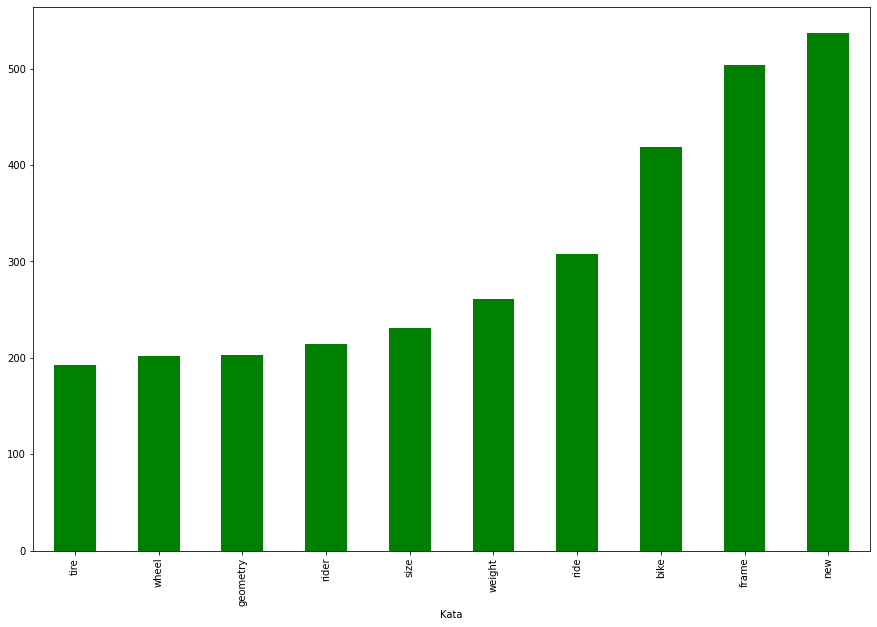

In [ ]:
import matplotlib.pyplot as plt
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc_clean_lemma'], 10)
df1 = pd.DataFrame(common_words, columns = ['Kata' , 'count'])
df1.groupby('Kata').sum()['count'].sort_values().plot.bar(color='green').fig = plt.figure(figsize = (15, 10))



plt.savefig('myplot.png')

In [ ]:
#merbah array ke dataframe
countvec2=pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#mengambil kata-kata dalam semua dokumen
kata_kata = count_vectorizer.get_feature_names()
kata_kata

['05',
 '10',
 '100',
 '1000',
 '1000grams',
 '100mm',
 '105',
 '105mm',
 '107g',
 '10mm',
 '10r',
 '11',
 '110mm',
 '11m',
 '11r',
 '12',
 '120',
 '1240',
 '12m',
 '12x2',
 '130',
 '130mm',
 '1400g',
 '140mm',
 '142mm',
 '148mm',
 '15',
 '150mm',
 '16',
 '16x2',
 '170',
 '18',
 '1kg',
 '1lb',
 '1x',
 '1x10',
 '1x11',
 '1x12',
 '1x13',
 '1x8',
 '1x9',
 '20',
 '200',
 '200mm',
 '2011',
 '2016',
 '20mm',
 '20x2',
 '22',
 '2250',
 '225x75mm',
 '22oz',
 '24',
 '240g',
 '24oz',
 '25',
 '255',
 '25g',
 '25mm',
 '26',
 '26ers',
 '26x4',
 '27',
 '28',
 '28mm',
 '29',
 '29er',
 '29with',
 '29x2',
 '2bliss',
 '2kg',
 '2lb',
 '2x',
 '2x10',
 '2x11',
 '2x8',
 '2x9',
 '30',
 '300',
 '30mm',
 '32',
 '321',
 '32mm',
 '33',
 '33mm',
 '34',
 '350',
 '350mm',
 '35mm',
 '36',
 '38',
 '38c',
 '38mm',
 '38t',
 '3d',
 '40',
 '400',
 '40000',
 '40km',
 '40mm',
 '42',
 '420mm',
 '425mm',
 '42c',
 '42mm',
 '42t',
 '44',
 '44mm',
 '45',
 '450g',
 '46',
 '460',
 '46t',
 '47mm',
 '50',
 '500',
 '50mm',
 '529',
 '

In [ ]:
#menambahkan kata-kata ke dalam dataframe

countvec3= pd.DataFrame(countvec,columns=kata_kata)
countvec3

,05,10,100,1000,1000grams,100mm,105,105mm,107g,10mm,10r,11,110mm,11m,11r,12,120,1240,12m,12x2,130,130mm,1400g,140mm,142mm,148mm,15,150mm,16,16x2,170,18,1kg,1lb,1x,1x10,1x11,1x12,1x13,1x8,...,wireless,wish,within,without,withstand,wizardry,wo,woman,wonderful,word,work,worked,working,workout,world,worry,worrying,worthy,wrapped,writes,wrote,x01,xc,xce,xcm,xcr,xct,xo1,xt,xtr,xx1,yard,yaw,yeah,year,yell,yellow,yet,young,zero
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#menyimpan file TF

file_name = 'TF.xlsx'
  
# saving the excel 
countvec3.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### **TF-IDF**








In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer= TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf= transformer.fit_transform(countvec)

In [ ]:
tfidf1= tfidf.toarray()
tfidf1

array([[0.        , 2.84176989, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.22866542, 0.        ,
        0.        ]])

In [ ]:
tfidf2= pd.DataFrame(tfidf1)
tfidf2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810
0,0.0,2.84177,0.0,4.020425,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.84177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,3.902642,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.646401,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,3.564757,0.000000,0.0,0.0,0.0,0.0,0.0,1.823200,0.0,0.0,0.0,2.249719,0.0,5.001254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,8.307913,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,4.153956,0.0,0.000000,1.782378,0.000000,0.0,0.0,0.0,0.0,0.0,5.469601,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,4.020425,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,2.84177,0.0,4.020425,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.84177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,3.902642,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,3.564757,0.000000,0.0,0.0,0.0,0.0,0.0,1.823200,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,3.327278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.249719,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.410987,0.0,0.0,0.000000,0.0,0.0
160,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.099866,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
161,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.964372,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.308107

In [ ]:
kata_kata2= count_vectorizer.get_feature_names()

In [ ]:
TF_IDF=pd.DataFrame(tfidf1, columns=kata_kata2)
TF_IDF

,05,10,100,1000,1000grams,100mm,105,105mm,107g,10mm,10r,11,110mm,11m,11r,12,120,1240,12m,12x2,130,130mm,1400g,140mm,142mm,148mm,15,150mm,16,16x2,170,18,1kg,1lb,1x,1x10,1x11,1x12,1x13,1x8,...,wireless,wish,within,without,withstand,wizardry,wo,woman,wonderful,word,work,worked,working,workout,world,worry,worrying,worthy,wrapped,writes,wrote,x01,xc,xce,xcm,xcr,xct,xo1,xt,xtr,xx1,yard,yaw,yeah,year,yell,yellow,yet,young,zero
0,0.0,2.84177,0.0,4.020425,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.84177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,3.902642,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.646401,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,3.564757,0.000000,0.0,0.0,0.0,0.0,0.0,1.823200,0.0,0.0,0.0,2.249719,0.0,5.001254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,8.307913,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,4.153956,0.0,0.000000,1.782378,0.000000,0.0,0.0,0.0,0.0,0.0,5.469601,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,4.020425,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,2.84177,0.0,4.020425,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.84177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,3.902642,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,3.564757,0.000000,0.0,0.0,0.0,0.0,0.0,1.823200,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,3.327278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.249719,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.410987,0.0,0.0,0.000000,0.0,0.0
160,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.099866,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
161,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.964372,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00

In [ ]:
file_name = 'TF-IDF.xlsx'
  
# saving the excel 
TF_IDF.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### **Cosine Similarity**

In [ ]:
cos_sim= cosine_similarity(tfidf, tfidf)
cos_sim

array([[1.        , 0.07615624, 0.05886864, ..., 0.04714467, 0.06304245,
        0.07231919],
       [0.07615624, 1.        , 0.13537267, ..., 0.08154651, 0.06332899,
        0.07697499],
       [0.05886864, 0.13537267, 1.        , ..., 0.12516633, 0.13124175,
        0.15258364],
       ...,
       [0.04714467, 0.08154651, 0.12516633, ..., 1.        , 0.37316041,
        0.42114062],
       [0.06304245, 0.06332899, 0.13124175, ..., 0.37316041, 1.        ,
        0.44847699],
       [0.07231919, 0.07697499, 0.15258364, ..., 0.42114062, 0.44847699,
        1.        ]])

# **RECOMENDATION**

In [ ]:
# Set index utama di kolom 'bike_name'
df.set_index('bike_name', inplace=True)
indices = pd.Series(df.index)
indices[:164]

0                  S-Works Shiv Disc
1      S-Works Aethos - Dura Ace Di2
2                S-Works Stumpjumper
3                   Shiv Expert Disc
4           Aethos Pro - Ultegra Di2
                   ...              
159          Sirrus 2.0 Step Through
160                     Sirrus X 2.0
161                    Pitch Comp 1X
162                      Pitch Sport
163                       Pitch 27.5
Name: bike_name, Length: 164, dtype: object

In [ ]:
def recommendations(bike_name, cos_sim = cos_sim):
    
    recommended_sepeda = []
    
    # Mengambil nama sepeda berdasarkan variabel indicies
    idx = indices[indices == bike_name].index[0]

    # Membuat series berdasarkan skor kesamaan
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    # mengambil index dan dibuat 10 baris rekomendasi terbaik
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommended_sepeda.append(list(df.index)[i])
        
    return recommended_sepeda

In [ ]:
recommendations('Roll Elite')

['Roll Elite - Low-Entry',
 'Roll',
 'Roll Sport',
 'Roll - Low-Entry',
 'Roll Sport - Low-Entry',
 'Crossroads 2.0 Step-Through',
 'Crossroads 1.0 Step-Through',
 'Crossroads 3.0 Step-Through',
 'Crossroads 2.0',
 'Crossroads 1.0']

In [ ]:
cos_sim[108]

array([0.05254103, 0.04916663, 0.05244624, 0.05017626, 0.04290866,
       0.0439719 , 0.0359402 , 0.05189601, 0.06614884, 0.04483454,
       0.03417954, 0.06795012, 0.0681027 , 0.06907032, 0.03329172,
       0.04015897, 0.05143105, 0.05143105, 0.02871792, 0.05309702,
       0.05254103, 0.0696164 , 0.03859031, 0.0441218 , 0.04063505,
       0.05702079, 0.01287713, 0.01295282, 0.06478017, 0.04898692,
       0.06974772, 0.07121639, 0.08676758, 0.0849663 , 0.03415181,
       0.08969126, 0.03306506, 0.05060525, 0.01879666, 0.05734687,
       0.08825745, 0.07515726, 0.03548526, 0.05011463, 0.05026357,
       0.05026986, 0.04968904, 0.06037991, 0.0582014 , 0.05377695,
       0.03862582, 0.09752569, 0.06222356, 0.01538797, 0.05143215,
       0.03142733, 0.06208875, 0.0241913 , 0.04870269, 0.05101637,
       0.08625882, 0.06413938, 0.09431935, 0.02413938, 0.05095937,
       0.04475612, 0.04244629, 0.06295007, 0.01757411, 0.09973588,
       0.04173854, 0.06446819, 0.03007407, 0.01871849, 0.03548

In [ ]:
nilai_cosim= pd.DataFrame(cos_sim[108])
nilai_cosim

,0
0,0.052541
1,0.049167
2,0.052446
3,0.050176
4,0.042909
...,...
159,0.122086
160,0.111190
161,0.098621
162,0.138193


In [ ]:
file_name = 'cosim.xlsx'
  
# saving the excel 
nilai_cosim.to_excel(file_name) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
